The derivative of a function at some point characterizes the rate of change of the function at this point. We can estimate the derivative of a function $f$ at point x as follows:
$$\frac{d}{dx}f = lim_{\Delta x \rightarrow \infty} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$



### Sum Rule ###

$$ \frac{d}{dx} (f(x) + g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x) $$

### Power Rule ###
$$ f(x) = ax^b \rightarrow \frac{d}{dx}f = abx^{b-1}$$

### Product Rule ###
$$ \frac{d}{dx} f(x)g(x) = f(x)\frac{d}{dx}g(x) + g(x)\frac{d}{dx}f(x) $$

### Chain Rule ###
$$
F(x) = f(g(x)) \rightarrow \frac{d}{dx}F(x) = \frac{d}{d(g(x))}f(g(x))*\frac{d}{dx}g(x)
$$

### Taking Derivatives in Python ###

#### Example 1: ###

Find the derivative of $f(x) = 2x^3$

In [1]:
import sympy as sym #import the library
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
x = sym.Symbol('x') # Declare a variable that you will use as a letter in your functions.

In [3]:
f = lambda x: 2*x**3

In [4]:
diff_f = sym.diff(2*x**3)

In [5]:
diff_f 

6*x**2

In [6]:
diff_f_func = sym.lambdify(x, diff_f) # Use method lambdify to convert 
                                        # the derivative into a funciton
                                        # (symbol, sym.diff output)

In [7]:
f(5)

250

In [8]:
diff_f_func(5) #Find the derivative of function f at point x = 5

150

#### Exercise 1 ####
Write a function named plot_derivative that takes as input a string representing a function and a  tuple representing the interval in the x-axis and plots both the function and its derivate in the specified interval.

In [9]:
def plot_derivatives(f,  interval):
    (start, end) = interval
    # str -> func
    func = lambda x: eval(f)
    # str to a symbol
    x = sym.Symbol('x')
    # get a derivative "symbol"
    diff = sym.diff(eval(f))
    # symbol (str-like thingy) --> func object, for the DERIVATIVE
    diff_func = sym.lambdify(x, diff)
    # apply both the func and its derivative over the interval
    domain = np.linspace(start, end, 1000)
    plt.plot(domain, np.vectorize(func)(domain), label = f)
    plt.plot(domain, np.vectorize(diff_func)(domain), label = diff)
    plt.grid(linestyle='--', linewidth=0.5)  # cool trick to make the plot prettier
    plt.legend()
    plt.show()

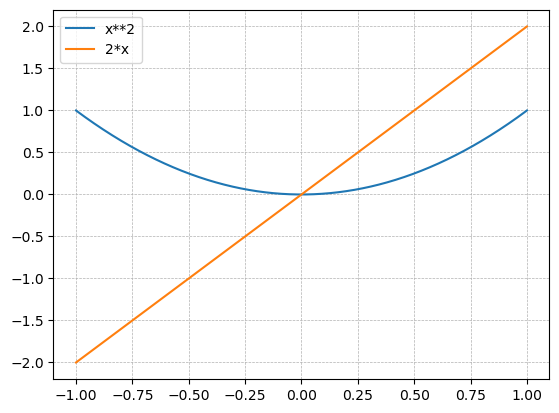

In [10]:
plot_derivatives('x**2', (-1,1))

### Exercise 2 ###
1. Derive the derivative of $f(x) = ln(x)$ directly from the definition of the derivative as a limit.
2. Write a function that plot $f(x)$ and $f'(x)$.


In [90]:
def plot_logarithmic(domain):
    (start, end) = domain
    # str -> func
    f = 'log(x)'
    x = sym.Symbol('x')
    # get a derivative "symbol" - using native sympy
    func = sym.log
    diff = func(x).diff()
    # symbol (str-like thingy) --> func object, for the DERIVATIVE
    diff_func = sym.lambdify(x, diff)
    # apply both the func and its derivative over the interval
    domain = np.linspace(start, end, 1000)
    plt.plot(domain, np.vectorize(func)(domain), label = f)
    plt.plot(domain, np.vectorize(diff_func)(domain), label = diff)
    plt.grid(linestyle='--', linewidth=0.5)  # cool trick to make the plot prettier
    plt.legend()
    plt.show()

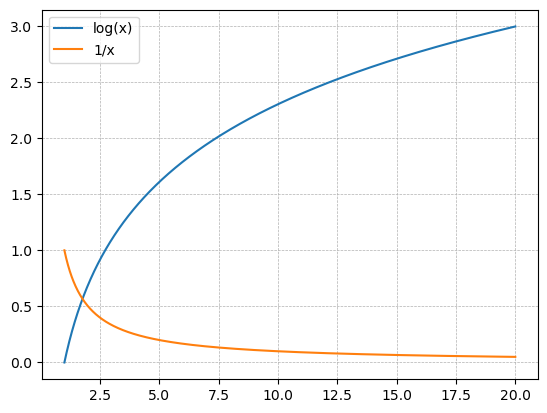

In [91]:
plot_logarithmic((1,20))

## First derivative Approximations ##

Three approximations to the derivative $f'(x)$ are:

1. the one-sided(forward) difference: $\frac{f(x + \Delta x) - f(x)}{\Delta x}$

2. the one-sided(backward) difference: $\frac{f(x) - f(x - \Delta x)}{\Delta x}$

3. the central difference: $\frac{f(x + \Delta x)  - f(x - \Delta x)}{2\Delta x}$

### Exercise 3 ###
Implement the following functions:

In [22]:
def forward_difference(f, x, delta):
    # h = delta
    return (f(x + delta) - f(x))/delta
def backward_difference(f, x, delta):
    return (f(x) - f(x - delta))/delta
def central_difference(f, x, delta):
    return (f(x + delta) - f(x - delta))/(2*delta)

### Exercise 4 ###
Use the forward difference, and the values of $\Delta x$ shown, to approximate the derivative of $cos(x)$ at $x = \pi/3$.

a) $\Delta x$ = 0.1

b) $\Delta x$ = 0.01

c) $\Delta x$ = 0.001

d) $\Delta x$ = 0.0001

In [24]:
from math import cos, sin, pi
deltas = [0.1, 0.01, 0.001, 0.0001]
y = np.vectorize(forward_difference)(cos, np.pi/3, np.array(deltas))
#find the exact value of the derivative (which we know from the derivative rules)
diff = -sin(pi/3)
#print the error produced for each value of delta
error = y - diff

In [25]:
print("Approximations", y)
print("Exact Diff Value", diff)
print("Errors, ", error)

Approximations [-0.88956192 -0.86851095 -0.86627526 -0.8660504 ]
Exact Diff Value -0.8660254037844386
Errors,  [-2.35365195e-02 -2.48554548e-03 -2.49855641e-04 -2.49985561e-05]


### Exercise 4 ###
Use the central difference, and the values of $\Delta x$ shown, to approximate the derivative of $cos(x)$ at $x = \pi/3$.

NOTE: a delta decreases, the error will decrease
      if you use the central difference, it will usually be the best approximation

a) $\Delta x$ = 0.1

b) $\Delta x$ = 0.01

c) $\Delta x$ = 0.001

d) $\Delta x$ = 0.0001

In [26]:
deltas = [0.1, 0.01, 0.001, 0.0001]
y = np.vectorize(central_difference)(cos, np.pi/3, np.array(deltas))
#find the exact value of the derivative:
diff = -sin(pi/3)
#print the error produced for each value of delta
error = y - diff

In [27]:
print("Approximations", y)
print("Exact Diff Value", diff)
print("Errors, ", error)

Approximations [-0.86458275 -0.86601097 -0.86602526 -0.8660254 ]
Exact Diff Value -0.8660254037844386
Errors,  [1.44265416e-03 1.44336846e-05 1.44337676e-07 1.44372980e-09]


### Exercise 5 ###
The distance x of a runner from a fixed point is measured (in meters) at intervals of half a second. The data are:

((0.0, 0.00), (0.5, 3.65), (1.0, 6.80), (1.5, 9.90), (2.0, 12.15))

Use central differences to approximate the runner's velocity at times t = 0.5 s at t = 1.25 s

$$ 
x'(0.5) \approx \frac{x(1.0) - x(0.0)}{2*0.5} = \frac{6.8 - 0}{1} = 6.8 m/s
$$

$$ 
x'(1.25) \approx \frac{x(1.5) - x(1.0)}{2*0.25} = \frac{9.9 - 6.8}{0.5} = 4.4 m/s
$$

## Second Derivative Approximation ##

A central difference approximation ot the second derivative $f''(x)$ is:

$$ f''(x) \approx \frac{f(x + \Delta x) - 2f(x) + f(x - \Delta x)}{\Delta x^2} $$

## Exercise 6 ##

Consideing the distance of the runner x, user a central difference to approximate the runner's acceleration at t = 1.5s.

$$ x''(1.5) \approx \frac{x(2.0) - 2x(1.5) + x(1.0)}{0.5^2} = -3.40m/s^2 $$

Credits: https://learn.lboro.ac.uk/archive/olmp/olmp_resources/pages/workbooks_1_50_jan2008/Workbook31/31_3_num_diff.pdf

## numpy.gradient() ##

In [52]:
import numpy as np

### Exercise 7 ###

Compute the gradients of $f(x) = x^2$ for 1000 points uniformly spread in the [-1, 1] interval. Use np.gradient().

In [55]:
interval = np.linspace(-1, 1, 10)
np.gradient()

array([-1.77777778, -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  1.77777778])

### Exercise 8 ###

Using gradient method of numpy compute the velocity at any point in time in distance function given in Exercise 5.

In [7]:
xy = ((0.0, 0.00), (0.5, 3.65), (1.0, 6.80), (1.5, 9.90), (2.0, 12.15))
np.gradient(
    np.array([y for x,y in xy]),
    np.array([x for x,y in xy])
)

array([7.3 , 6.8 , 6.25, 5.35, 4.5 ])

## Partial Derivatives ## 

In [57]:
x, y = sym.symbols('x y')
print("Gradient is ", [sym.diff('x**2 + y**2', x), sym.diff('x**2 + y**2', y)])

Gradient is  [2*x, 2*y]
